# Regresión logística
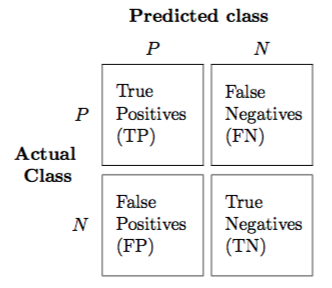

Curva ROC
https://es.wikipedia.org/wiki/Curva_ROC



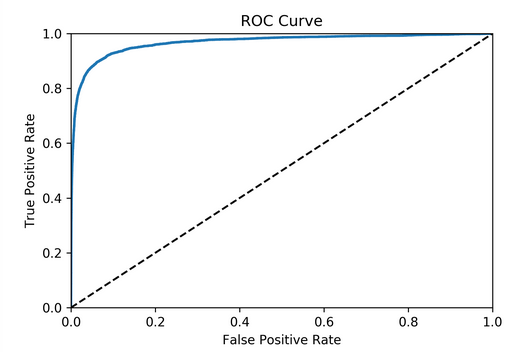

In [191]:
datos=spark.read.format("libsvm")\
.load("/usr/local/spark/data/mllib/sample_libsvm_data.txt")

In [192]:
datos.printSchema(),datos.show()

root
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(692,[127,128,129...|
|  1.0|(692,[158,159,160...|
|  1.0|(692,[124,125,126...|
|  1.0|(692,[152,153,154...|
|  1.0|(692,[151,152,153...|
|  0.0|(692,[129,130,131...|
|  1.0|(692,[158,159,160...|
|  1.0|(692,[99,100,101,...|
|  0.0|(692,[154,155,156...|
|  0.0|(692,[127,128,129...|
|  1.0|(692,[154,155,156...|
|  0.0|(692,[153,154,155...|
|  0.0|(692,[151,152,153...|
|  1.0|(692,[129,130,131...|
|  0.0|(692,[154,155,156...|
|  1.0|(692,[150,151,152...|
|  0.0|(692,[124,125,126...|
|  0.0|(692,[152,153,154...|
|  1.0|(692,[97,98,99,12...|
|  1.0|(692,[124,125,126...|
+-----+--------------------+
only showing top 20 rows



(None, None)

In [193]:
datos.head(1)

[Row(label=0.0, features=SparseVector(692, {127: 51.0, 128: 159.0, 129: 253.0, 130: 159.0, 131: 50.0, 154: 48.0, 155: 238.0, 156: 252.0, 157: 252.0, 158: 252.0, 159: 237.0, 181: 54.0, 182: 227.0, 183: 253.0, 184: 252.0, 185: 239.0, 186: 233.0, 187: 252.0, 188: 57.0, 189: 6.0, 207: 10.0, 208: 60.0, 209: 224.0, 210: 252.0, 211: 253.0, 212: 252.0, 213: 202.0, 214: 84.0, 215: 252.0, 216: 253.0, 217: 122.0, 235: 163.0, 236: 252.0, 237: 252.0, 238: 252.0, 239: 253.0, 240: 252.0, 241: 252.0, 242: 96.0, 243: 189.0, 244: 253.0, 245: 167.0, 262: 51.0, 263: 238.0, 264: 253.0, 265: 253.0, 266: 190.0, 267: 114.0, 268: 253.0, 269: 228.0, 270: 47.0, 271: 79.0, 272: 255.0, 273: 168.0, 289: 48.0, 290: 238.0, 291: 252.0, 292: 252.0, 293: 179.0, 294: 12.0, 295: 75.0, 296: 121.0, 297: 21.0, 300: 253.0, 301: 243.0, 302: 50.0, 316: 38.0, 317: 165.0, 318: 253.0, 319: 233.0, 320: 208.0, 321: 84.0, 328: 253.0, 329: 252.0, 330: 165.0, 343: 7.0, 344: 178.0, 345: 252.0, 346: 240.0, 347: 71.0, 348: 19.0, 349: 28.0

In [194]:
datos.count()

100

In [195]:
entrena,evalua=datos.randomSplit([0.8,0.2])

In [196]:
entrena.count(),evalua.count()

(79, 21)

In [197]:
from pyspark.ml.classification import LogisticRegression

In [198]:
lr=LogisticRegression()

In [199]:
modelo=lr.fit(entrena)

In [200]:
modelo.summary.areaUnderROC

1.0

In [201]:
modelo.summary.predictions.select("label","prediction").show(100)

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|     

In [202]:
modelo.summary.roc.show()

+---+--------------------+
|FPR|                 TPR|
+---+--------------------+
|0.0|                 0.0|
|0.0|0.022727272727272728|
|0.0|0.045454545454545456|
|0.0| 0.06818181818181818|
|0.0| 0.09090909090909091|
|0.0| 0.11363636363636363|
|0.0| 0.13636363636363635|
|0.0|  0.1590909090909091|
|0.0| 0.18181818181818182|
|0.0| 0.20454545454545456|
|0.0| 0.22727272727272727|
|0.0|                0.25|
|0.0|  0.2727272727272727|
|0.0| 0.29545454545454547|
|0.0|  0.3181818181818182|
|0.0|  0.3409090909090909|
|0.0| 0.36363636363636365|
|0.0| 0.38636363636363635|
|0.0|  0.4090909090909091|
|0.0|  0.4318181818181818|
+---+--------------------+
only showing top 20 rows



In [203]:
#Forma simplificada de evaluación: 
#sólo funciona con regresión lineal y logística
evaluacion=modelo.evaluate(evalua)

In [204]:
evaluacion.areaUnderROC

1.0

In [205]:
modeloOK=lr.fit(datos)

In [206]:
rocP=modeloOK.summary.roc.toPandas()

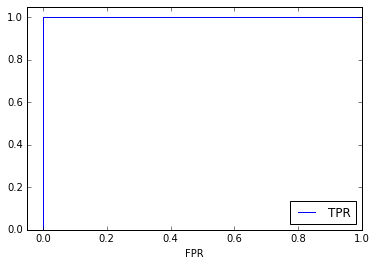

In [207]:
rocP.plot(x="FPR",y="TPR",xlim=[-0.05,1],ylim=[0,1.05])

In [208]:
# Evaluación generalizada para todos los algoritmos

In [209]:
prediccion=modelo.transform(evalua)

In [210]:
prediccion.select("label","prediction").show(30)

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
+-----+----------+



In [211]:
from pyspark.ml.evaluation import (BinaryClassificationEvaluator,
                            MulticlassClassificationEvaluator)

In [212]:
evaluadorB=BinaryClassificationEvaluator()

In [213]:
evaluadorB.evaluate(prediccion)

1.0

In [214]:
evaluadorM=MulticlassClassificationEvaluator(metricName="accuracy")

In [215]:
evaluadorM.evaluate(prediccion)

1.0